# <font color="#8333ff">PROJET 5 | EVALUATION DU MODELE AVEC L' ARI 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt


from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

In [2]:
# Chargement des données brutes nous permettant de filtrer la période
df_raw_data = pd.read_csv('Part3_train_merged.csv')

In [3]:
df_raw_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,recency,delivery_time,delay,monetary,frequency,product_volume,avg_prod_vol,avg_prod_weight,median_review_score,prod_cat_t10,freq_class
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87,519,8.0,10.0,146.87,1,107136.0,107136.0,8683.0,4.0,other,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,credit_card,8.0,335.48,277,16.0,7.0,335.48,1,53400.0,53400.0,10150.0,5.0,utilidades_domesticas,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73,151,26.0,-2.0,157.73,1,45968.0,45968.0,8267.0,5.0,other,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30,218,14.0,12.0,173.30,1,79968.0,79968.0,12160.0,5.0,other,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25,80,11.0,5.0,252.25,1,23625.0,23625.0,5200.0,5.0,other,1


In [4]:
# Chargement des données encodées
df_train = pd.read_csv('p05_part2_source_clean.csv')

In [5]:
df_train.head()

,customer_unique_id,avg_prod_vol,avg_prod_weight,median_review_score,recency,monetary,frequency,delivery_time,delay,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,prod_cat_t10_automotivo,prod_cat_t10_beleza_saude,prod_cat_t10_cama_mesa_banho,prod_cat_t10_esporte_lazer,prod_cat_t10_ferramentas_jardim,prod_cat_t10_informatica_acessorios,prod_cat_t10_moveis_decoracao,prod_cat_t10_other,prod_cat_t10_relogios_presentes,prod_cat_t10_telefonia,prod_cat_t10_utilidades_domesticas,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,861eff4711a542e4b93843c6dd7febb0,6000.0,563.0,4.0,519.0,146.87,1.0,8.0,10.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,290c77bc529b7ac935b93aa66c333dc3,53400.0,563.0,5.0,277.0,335.48,1.0,16.0,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,060e732b5b29e8181a18229c7b0b2b5e,45968.0,563.0,5.0,151.0,157.73,1.0,26.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,259dac757896d24d7702b9acbbff3f3c,6000.0,563.0,5.0,218.0,173.30,1.0,14.0,12.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,345ecd01c38d18a9036ed96c73b8d066,23625.0,5200.0,5.0,80.0,252.25,1.0,11.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
# On passe les colonnes de date au format datetime
df_raw_data[['order_delivered_customer_date',
             'order_purchase_timestamp',
             'order_estimated_delivery_date']] = df_raw_data[[
                 'order_delivered_customer_date',
                 'order_purchase_timestamp',
                 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [7]:
# table avec nouvelles variables calculées sur la période considérée

def new_features(df, start_date, end_date):

    df = df_raw_data[(df_raw_data['order_purchase_timestamp'] >= start_date)
                     & (df_raw_data['order_purchase_timestamp'] <= end_date)].copy()

    # nb jours écoulés depuis la dernière commande
    recency = pd.to_datetime(df.groupby(
        'customer_unique_id')['order_purchase_timestamp'].max())

    df['recency'] = pd.to_datetime(df['order_purchase_timestamp'].max(
    )) - df['customer_unique_id'].map(recency)

    df['recency'] = df['recency'].dt.days

    # delais de livraison
    df['delivery_time'] = df['order_delivered_customer_date'] - \
        df['order_purchase_timestamp']

    avg_delivery_time = df.groupby(
        'customer_unique_id')['delivery_time'].mean()

    df['delivery_time'] = df['customer_unique_id'].map(
        avg_delivery_time)

    df['delivery_time'] = df['delivery_time'].dt.days

    # retard de livraison
    df['delay'] = df['order_delivered_customer_date'] - \
        df['order_estimated_delivery_date']

    avg_delay = df.groupby(
        'customer_unique_id')['delay'].mean()

    df['delay'] = df['customer_unique_id'].map(
        avg_delay)
    df['delay'] = df['delay'].dt.days

    # dépense par client
    monetary = df.groupby('customer_unique_id')[
        'payment_value'].sum()

    df['monetary'] = df['customer_unique_id'].map(
        monetary)

    # nombre de commandes par client
    frequency = df.groupby('customer_unique_id')[
        'order_id'].nunique()

    df['frequency'] = df['customer_unique_id'].map(
        frequency)

    # Volume produit
    df['product_volume'] = df['product_height_cm'] * \
        df['product_width_cm'] * df['product_length_cm']

    avg_prod_vol = df.groupby('customer_unique_id')[
        'product_volume'].mean()

    df['avg_prod_vol'] = df['customer_unique_id'].map(
        avg_prod_vol)

    # Poids moyen article par client
    avg_prod_weight = df.groupby('customer_unique_id')[
        'product_weight_g'].mean()

    df['avg_prod_weight'] = df['customer_unique_id'].map(
        avg_prod_weight)

    # score median avis utilisateur
    median_review_score = df.groupby('customer_unique_id')[
        'review_score'].median()

    df['median_review_score'] = df['customer_unique_id'].map(
        median_review_score)

    # création d'une table avec une ligne = 1 client et qui comprends les variables numériques retenues
    df = df[['customer_unique_id', 'avg_prod_vol', 'avg_prod_weight', 'median_review_score',
             'recency', 'monetary', 'frequency', 'delivery_time',
             'delay']]

    df = df.drop_duplicates(subset='customer_unique_id')
    df.set_index('customer_unique_id', inplace=True)
    #traitement des valeurs nulles
    df = df.fillna(df.median())
    df = df[['recency', 'monetary', 'frequency']]

    return df

# Classsification de référence

Nous allons entraîner notre modèle sur la période **04-09-2016** (qui correspond à la date d'achat la plus ancienne), jusqu'au **31-12-2017**. Nous analyserons donc l'evolution de la qualité du modèle pour la période débutant le 01-01-2018<br><br>
Le modèle sera basé sur les variables RFM.

In [8]:
# rappel des bornes de dates du jeu de donnée
print(
    f" date min:  {min(df_raw_data['order_purchase_timestamp'])} , date max : {max(df_raw_data['order_purchase_timestamp'])}")

 date min:  2016-09-04 21:15:19 , date max : 2018-10-17 17:30:18


In [9]:
df_ref = new_features(df_raw_data, datetime(
    2016, 9, 4), datetime(2017, 12, 31))
df_ref

,recency,monetary,frequency
customer_unique_id,,,
861eff4711a542e4b93843c6dd7febb0,228,146.87,1
4c93744516667ad3b8f1fb645a3116a4,76,565.88,2
57b2a98a409812fe9618067b6b8ebe4f,44,36.01,1
2a7745e1ed516b289ed9b29c7d0539a5,33,40.40,1
918dc87cd72cd9f6ed4bd442ed785235,112,117.31,1
...,...,...,...
277490f0d435b602fe4475d4b89e9181,220,102.03,1
e7f8760e2bbd2f1986bebd99596c088e,290,84.32,1
4b5820135d360a45552b5163835b1d89,13,75.88,1


In [10]:
# Normalisation des valeurs sur la période de référence
scaler = StandardScaler()
scaler.fit(df_ref)

scaler_ref = scaler

df_ref_scaled = scaler_ref.transform(df_ref)

In [11]:
# on entraîne un KMeans sur la période de référence
kmeans_ref = KMeans(n_clusters=4, init='k-means++').fit(df_ref_scaled)

# Simulation de classifications


In [12]:
start_date = datetime(2018, 1, 1)
end_date = datetime(2018, 10, 4)  # Exemple de fin

# Calcul du nombre de semaines entre les dates de début et de fin

week_diff = (end_date.year - start_date.year) + \
    (end_date.month - start_date.month)*2

score_list = []
dates = []
for delta in range(0, week_diff + 1):
    current_end_date = start_date + relativedelta(weeks=+delta*2)

    df_current = new_features(
        df_raw_data, datetime(2016, 9, 4), current_end_date)

    df_current_ref = df_current.copy()

    # Normalisation des données à jour
    scaler_current = StandardScaler()
    df_current_scaled = scaler_current.fit_transform(df_current)

    # KMeans entraîné sur les données de référence + mois écoulé
    kmeans_current = KMeans(
        n_clusters=4, init='k-means++').fit(df_current_scaled)

    # clusters avec donnée à jour et modèle entraîné avec données à jour
    y_current = kmeans_current.labels_

    # Normalisation des données à jour avec le scaler entraîné
    df_current_ref_scaled = scaler_ref.transform(
        df_current_ref)

    # Prédiction avec le modèle pré-entraîné
    y_ref = kmeans_ref.predict(df_current_ref_scaled)

    # Calcul de l'Adjusted Rand Score par rapport à la première partition

    score = adjusted_rand_score(y_current, y_ref)

    print(f"Mois S{delta} Score: {score} end date {current_end_date} ")
    print(len(y_ref))
    score_list.append(score)
    dates.append(current_end_date)

Mois S0 Score: 0.9897834505024736 end date 2018-01-01 00:00:00 
44034
Mois S1 Score: 0.9344871666223095 end date 2018-01-15 00:00:00 
47098
Mois S2 Score: 0.8814334127869943 end date 2018-01-29 00:00:00 
50324
Mois S3 Score: 0.5601810670918349 end date 2018-02-12 00:00:00 
53386
Mois S4 Score: 0.785175835218998 end date 2018-02-26 00:00:00 
56641
Mois S5 Score: 0.749758616951712 end date 2018-03-12 00:00:00 
60051
Mois S6 Score: 0.697895885742857 end date 2018-03-26 00:00:00 
63253
Mois S7 Score: 0.677553556424786 end date 2018-04-09 00:00:00 
66212
Mois S8 Score: 0.6297971637647458 end date 2018-04-23 00:00:00 
69334
Mois S9 Score: 0.5011522799363396 end date 2018-05-07 00:00:00 
72662
Mois S10 Score: 0.4437294849575475 end date 2018-05-21 00:00:00 
76357
Mois S11 Score: 0.41798141600353367 end date 2018-06-04 00:00:00 
78303
Mois S12 Score: 0.3818166920827676 end date 2018-06-18 00:00:00 
81145
Mois S13 Score: 0.33569419296052705 end date 2018-07-02 00:00:00 
83904
Mois S14 Score: 0.

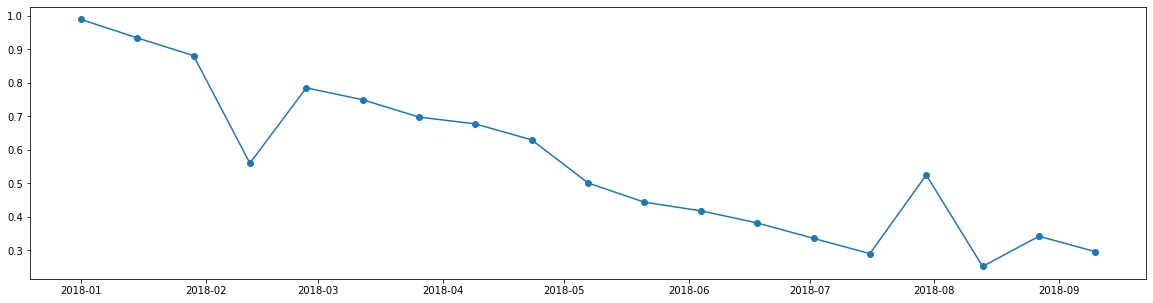

In [13]:
plt.figure(figsize=(20, 5))

plt.plot(dates, score_list, marker='o')

plt.show()

L'évolution de l'ARI nous montre qu'il sera recommandé de réentraîner notre modèle au bout de 6 semaines